In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('breastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# removing id and unnamed: 32 column which is not necessary for our model
df = df.drop(['id','Unnamed: 32'], axis = 1)

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

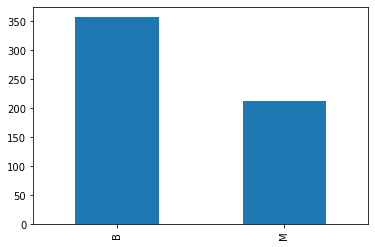

In [9]:
df['diagnosis'].value_counts().plot(kind='bar')

In [10]:
df['diagnosis'] = pd.get_dummies(df['diagnosis'], drop_first=True)
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

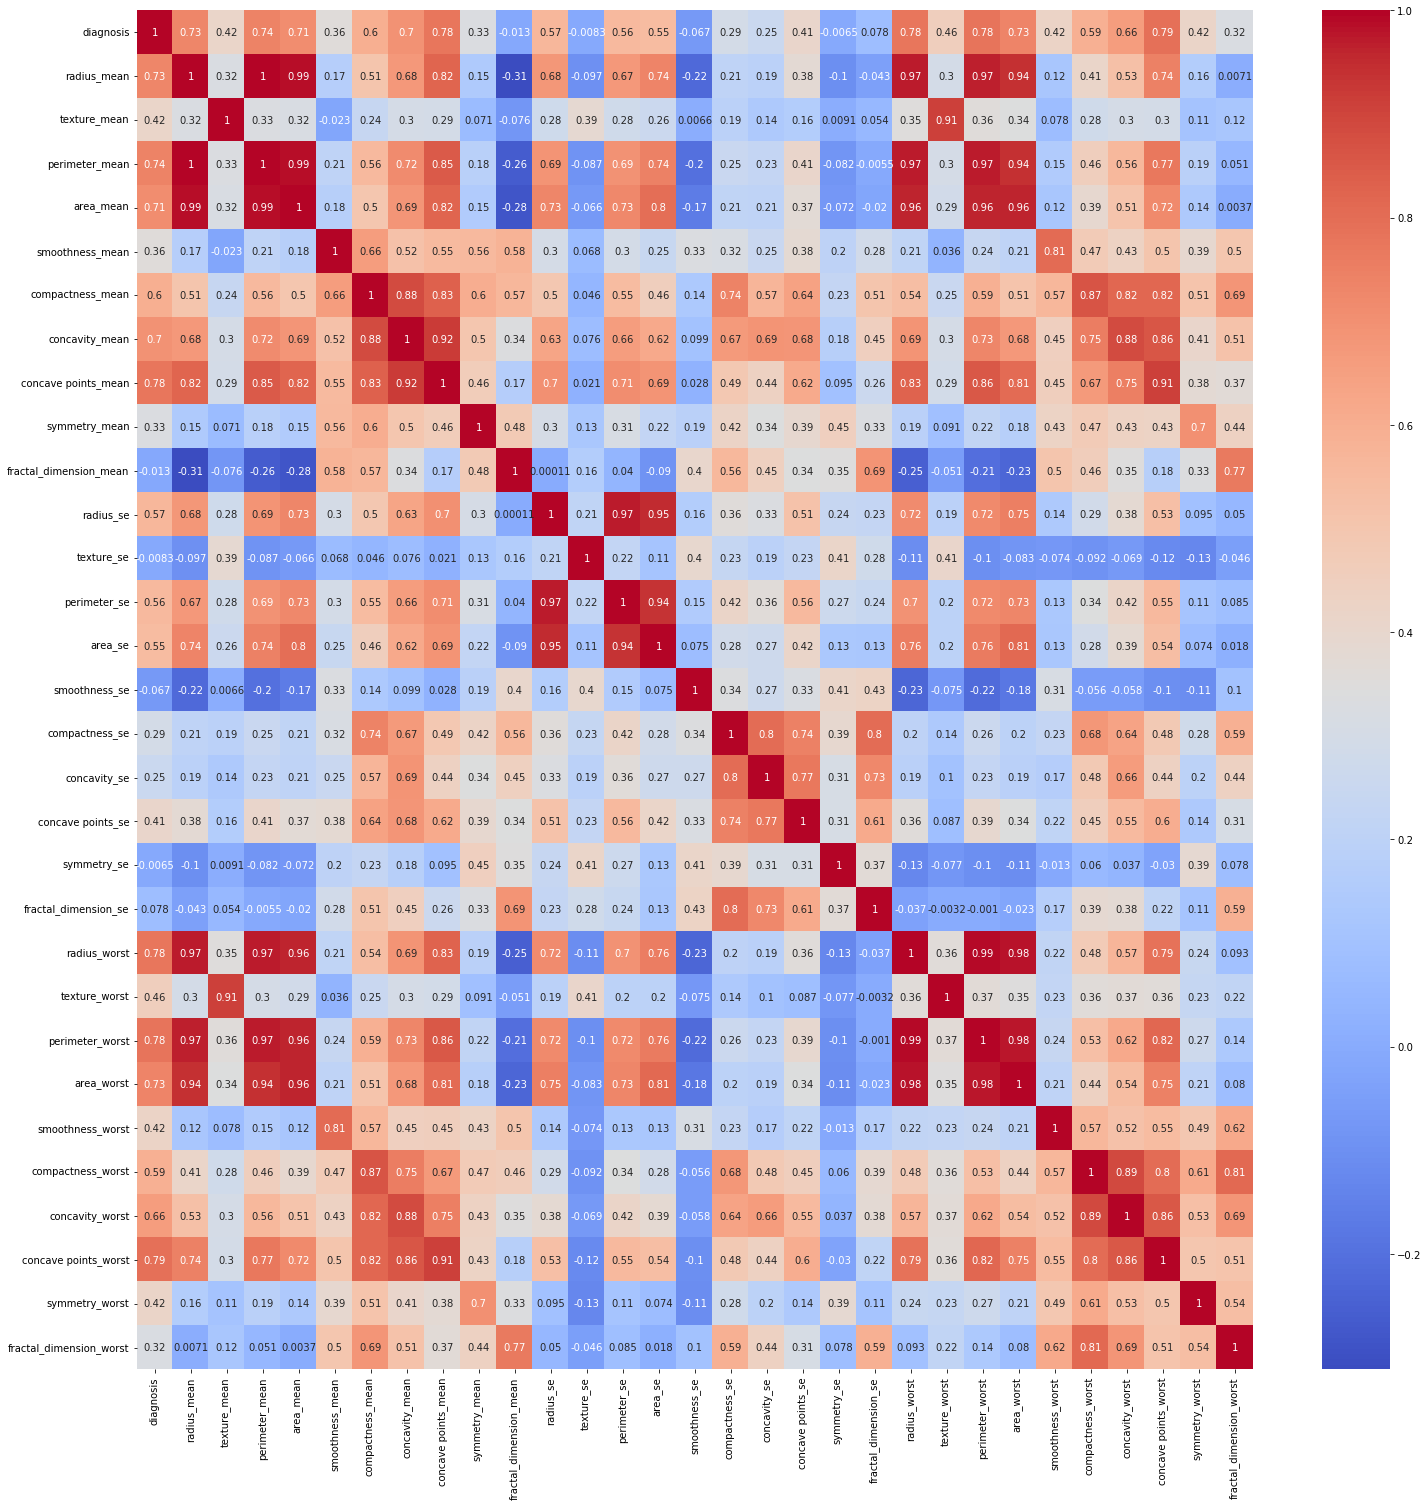

In [11]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [12]:
# removing features that are less correlated with our target variable
less_corr = df.corr().diagnosis[df.corr().diagnosis<=0.2].index
df = df.drop(less_corr,axis=1)

In [13]:
df.shape

(569, 26)

In [14]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

df_scale = df.drop(['diagnosis'],axis = 1)
trans_scale = make_column_transformer((StandardScaler(), df_scale.columns),remainder = 'passthrough')

#### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 25) (114, 25) (455,) (114,)


In [17]:
trans_scale.fit_transform(X_train)

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

## Classification Models


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn import metrics

In [19]:
def testAccuracy(model):
    pipe = make_pipeline(trans_scale, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('Accuracy score on Test Data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

###  I. Logistic Regression

In [20]:
logReg = LogisticRegression(solver='lbfgs')
pipe = make_pipeline(trans_scale, logReg)

In [21]:
print('Accuracy score on Train data: {}'.format(cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy').mean()*100))

Accuracy score on Train data: 97.80676328502416


In [22]:
testAccuracy(logReg)

Accuracy score on Test Data: 97.36842105263158


### II. K Nearest Neighbors

In [23]:
knn_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe = make_pipeline(trans_scale, knn)
    knn_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

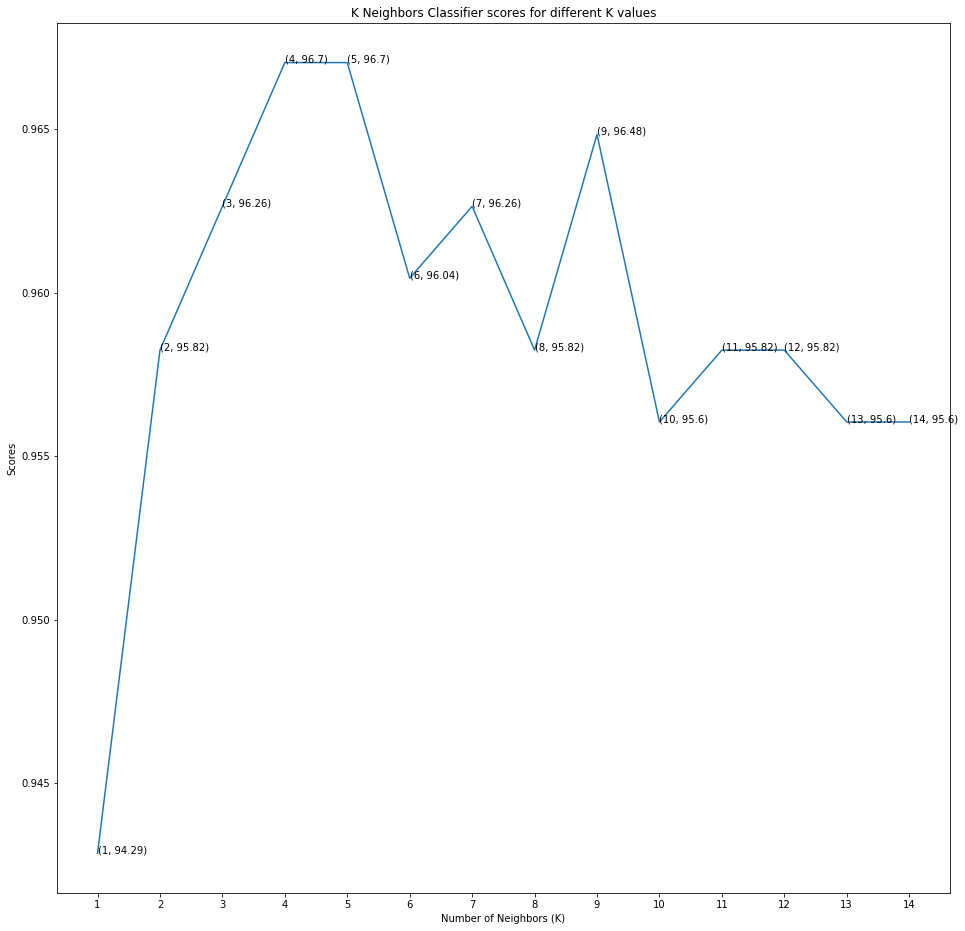

In [24]:
plt.figure(figsize=(16,16))
plt.plot([k for k in range(1, 15)], knn_scores)
for i in range(1,15):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [25]:
print('Accuracy score on Train data: {}'.format(knn_scores[4]*100))

Accuracy score on Train data: 96.70329670329669


In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 4)
testAccuracy(knn_classifier)

Accuracy score on Test Data: 94.73684210526315


### III. Support Vector Classifier

In [27]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(trans_scale, svc_classifier)
    svc_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

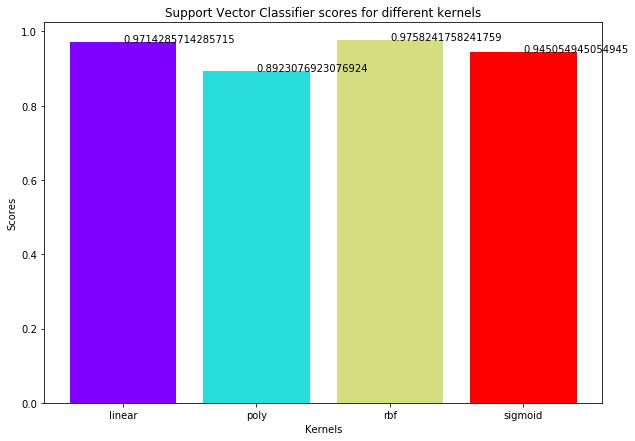

In [28]:
from matplotlib.cm import rainbow

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [29]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.58241758241759


In [30]:
svc_classifier = SVC(kernel = 'rbf')
testAccuracy(svc_classifier)

Accuracy score on Test Data: 96.49122807017544


##### Logisitc Regression performed well compared with other models. Let's run our model using Logistic Regression and have a look at its confusion matrix and check our False Negative rate which makes sense especially in health care field.

#### Confusion Matrix for Train Data

In [31]:
logReg.fit(X_train,y_train)
prediction=logReg.predict(X_train)

pd.crosstab(y_train, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,281,9,290
1,15,150,165
All,296,159,455


In [32]:
15/165

0.09090909090909091

#### Confusion Matrix for Test Data

In [33]:
prediction=logReg.predict(X_test)

pd.crosstab(y_test, prediction, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,62,5,67
1,2,45,47
All,64,50,114


In [34]:
2/47

0.0425531914893617

4.25% of observations in testing data are misclassified as Benign which actually is Malignant